#### This jupyter notebook contains a sample code that represents my work on classification machine learning model to predict Labels

**caveat: the performance of the model given the dummy dataset is terrible. It was much better with a dataset for the problem that it meant to solve. This highlights the importance of the quality of data for machine learning.


This the Deep Learning neural network version of the two-level architecture model. It has a simple configure without hyperparameter tuning or earlystopping.

In [59]:
import sys

import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import math

### 1. Dataset Preparation steps

In [60]:
# Create a dummy dataset of 100,000 rows in total that fit the problem
# Define the number of rows for each dataframe
num_rows = 100000

df = pd.DataFrame({
    'defect_1': np.random.randint(0, 2, size=num_rows),
    'defect_2': np.random.randint(0, 2, size=num_rows),
    'defect_3': np.random.randint(0, 2, size=num_rows),
    'defect_4': np.random.randint(0, 2, size=num_rows),
    'defect_5': np.random.randint(0, 2, size=num_rows),
    'defect_1_Type': np.random.choice(['A', 'B', 'C', 'D'], size=num_rows),
    'defect_2_Type': np.random.choice(['A', 'B', 'C', 'D'], size=num_rows),
    'defect_3_Type': np.random.choice(['A', 'B', 'C', 'D'], size=num_rows),
    'defect_4_Type': np.random.choice(['A', 'B', 'C', 'D'], size=num_rows),
    'defect_5_Type': np.random.choice(['A', 'B', 'C', 'D'], size=num_rows),
    'Reference': np.random.randint(0, 10, size=num_rows),
    'Lane': np.random.choice(['V1', 'V2'], size=num_rows),
    'TailleZone': np.random.randint(0, 100, size=num_rows),
    'Courbure': np.random.uniform(0, 1, size=num_rows),
    'CourbureVert': np.random.uniform(0, 1, size=num_rows),
    'Vitesse': np.random.uniform(0, 100, size=num_rows),
    'SensMarche': np.random.choice(['Forward', 'Backward'], size=num_rows),
    'Lat_acc_tete_Max': np.random.uniform(0, 1, size=num_rows),
    'Lat_acc_tete_Max_Pos': np.random.uniform(0, 100, size=num_rows),
    'Lat_acc_tete_Max_Pos_Moy': np.random.uniform(0, 100, size=num_rows),
    'Lat_acc_tete_Avg': np.random.uniform(0, 1, size=num_rows),
    'Lat_acc_tete_P2Avg': np.random.uniform(0, 1, size=num_rows),
    'Lat_acc_milieu_Max': np.random.uniform(0, 1, size=num_rows),
    'Lat_acc_milieu_Max_Pos': np.random.uniform(0, 100, size=num_rows),
    'Lat_acc_milieu_Max_Pos_Moy': np.random.uniform(0, 100, size=num_rows),
    'Lat_acc_milieu_Avg': np.random.uniform(0, 1, size=num_rows),
    'Lat_acc_milieu_P2Avg': np.random.uniform(0, 1, size=num_rows),
    'Lat_acc_queue_Max': np.random.uniform(0, 1, size=num_rows),
    'Lat_acc_queue_Max_Pos': np.random.uniform(0, 100, size=num_rows),
    'Lat_acc_queue_Max_Pos_Moy': np.random.uniform(0, 100, size=num_rows),
    'Lat_acc_queue_Avg': np.random.uniform(0, 1, size=num_rows),
    'Lat_acc_queue_P2Avg': np.random.uniform(0, 1, size=num_rows),
    'Vert_acc_tete_Max': np.random.uniform(0, 100, size=num_rows),
    'Vert_acc_tete_Max_Pos': np.random.uniform(0, 100, size=num_rows),
    'Vert_acc_tete_Max_Pos_Moy': np.random.uniform(0, 100, size=num_rows),
    'Vert_acc_tete_Avg': np.random.uniform(0, 1, size=num_rows),
    'Vert_acc_tete_P2Avg': np.random.uniform(0, 1, size=num_rows),
    'Vert_acc_milieu_Max': np.random.uniform(0, 1, size=num_rows),
    'Vert_acc_milieu_Max_Pos': np.random.uniform(0, 100, size=num_rows),
    'Vert_acc_milieu_Max_Pos_Moy': np.random.uniform(0, 100, size=num_rows),
    'Vert_acc_milieu_Avg': np.random.uniform(0, 1, size=num_rows),
    'Vert_acc_milieu_P2Avg': np.random.uniform(0, 1, size=num_rows),
    'Vert_acc_queue_Max': np.random.uniform(0, 1, size=num_rows),
    'Vert_acc_queue_Max_Pos': np.random.uniform(0, 100, size=num_rows),
    'Vert_acc_queue_Max_Pos_Moy': np.random.uniform(0, 100, size=num_rows),
    'Vert_acc_queue_Avg': np.random.uniform(0, 1, size=num_rows),
    'Vert_acc_queue_P2Avg': np.random.uniform(0, 1, size=num_rows),
    'G_Mean': np.random.uniform(0, 1, size=num_rows),
    'AUC': np.random.uniform(0, 1, size=num_rows),
    'F-Measure': np.random.uniform(0, 1, size=num_rows),
    'Specificity': np.random.uniform(0, 1, size=num_rows),
    'Precision': np.random.uniform(0, 1, size=num_rows),
    'Recall': np.random.uniform(0, 1, size=num_rows),
    'TPR': np.random.uniform(0, 1, size=num_rows),
    'FPR': np.random.uniform(0, 1, size=num_rows),
    'TNR': np.random.uniform(0, 1, size=num_rows),
    'FNR': np.random.uniform(0, 1, size=num_rows),
    'Youden': np.random.uniform(0, 1, size=num_rows),
    'Balanced_Accuracy': np.random.uniform(0, 1, size=num_rows),
    'ROC_Curve': np.random.uniform(0, 1, size=num_rows),
    'PR_Curve': np.random.uniform(0, 1, size=num_rows),
    'AP': np.random.uniform(0, 1, size=num_rows)
})

# Display the DataFrame
df.head()

,defect_1,defect_2,defect_3,defect_4,defect_5,defect_1_Type,defect_2_Type,defect_3_Type,defect_4_Type,defect_5_Type,...,Recall,TPR,FPR,TNR,FNR,Youden,Balanced_Accuracy,ROC_Curve,PR_Curve,AP
0,0,0,0,0,1,A,A,A,D,B,...,0.990594,0.809008,0.563227,0.472387,0.615974,0.094307,0.327075,0.540226,0.133943,0.032441
1,1,0,0,0,1,D,D,B,D,A,...,0.842302,0.900235,0.686617,0.911116,0.630364,0.951747,0.370230,0.589418,0.072146,0.890480
2,0,1,1,0,1,B,C,D,D,A,...,0.751722,0.507021,0.080241,0.742758,0.638161,0.820433,0.935423,0.351664,0.689718,0.582843
3,0,0,1,0,0,A,A,A,A,B,...,0.226009,0.788867,0.983046,0.871260,0.599608,0.348364,0.580285,0.424159,0.266092,0.019979
4,0,0,0,0,1,C,A,C,B,A,...,0.597951,0.046211,0.823594,0.338387,0.954862,0.731584,0.175130,0.657905,0.777870,0.958529


In [61]:
print(df.columns.tolist())

['defect_1', 'defect_2', 'defect_3', 'defect_4', 'defect_5', 'defect_1_Type', 'defect_2_Type', 'defect_3_Type', 'defect_4_Type', 'defect_5_Type', 'Reference', 'Lane', 'TailleZone', 'Courbure', 'CourbureVert', 'Vitesse', 'SensMarche', 'Lat_acc_tete_Max', 'Lat_acc_tete_Max_Pos', 'Lat_acc_tete_Max_Pos_Moy', 'Lat_acc_tete_Avg', 'Lat_acc_tete_P2Avg', 'Lat_acc_milieu_Max', 'Lat_acc_milieu_Max_Pos', 'Lat_acc_milieu_Max_Pos_Moy', 'Lat_acc_milieu_Avg', 'Lat_acc_milieu_P2Avg', 'Lat_acc_queue_Max', 'Lat_acc_queue_Max_Pos', 'Lat_acc_queue_Max_Pos_Moy', 'Lat_acc_queue_Avg', 'Lat_acc_queue_P2Avg', 'Vert_acc_tete_Max', 'Vert_acc_tete_Max_Pos', 'Vert_acc_tete_Max_Pos_Moy', 'Vert_acc_tete_Avg', 'Vert_acc_tete_P2Avg', 'Vert_acc_milieu_Max', 'Vert_acc_milieu_Max_Pos', 'Vert_acc_milieu_Max_Pos_Moy', 'Vert_acc_milieu_Avg', 'Vert_acc_milieu_P2Avg', 'Vert_acc_queue_Max', 'Vert_acc_queue_Max_Pos', 'Vert_acc_queue_Max_Pos_Moy', 'Vert_acc_queue_Avg', 'Vert_acc_queue_P2Avg', 'G_Mean', 'AUC', 'F-Measure', 'Specif

In [62]:
# Remove unwanted columns
geo_param_to_remove = ['defect_1', 'defect_2', 'defect_3', 'defect_4', 'defect_5']
for col in df.columns.tolist():
    if 'PR' in col or 'NR' in col:
        geo_param_to_remove.append(col)

zone_info_to_remove = ['G_Mean', 'AUC', 'F-Measure', 'Specificity', 'Precision', 'Recall' 
                       , 'Youden', 'Balanced_Accuracy', 'ROC_Curve', 'PR_Curve', 'AP']

remove_list = geo_param_to_remove + zone_info_to_remove

In [63]:
df.drop(remove_list, axis=1, inplace=True)
print(df.columns.tolist())

['defect_1_Type', 'defect_2_Type', 'defect_3_Type', 'defect_4_Type', 'defect_5_Type', 'Reference', 'Lane', 'TailleZone', 'Courbure', 'CourbureVert', 'Vitesse', 'SensMarche', 'Lat_acc_tete_Max', 'Lat_acc_tete_Max_Pos', 'Lat_acc_tete_Max_Pos_Moy', 'Lat_acc_tete_Avg', 'Lat_acc_tete_P2Avg', 'Lat_acc_milieu_Max', 'Lat_acc_milieu_Max_Pos', 'Lat_acc_milieu_Max_Pos_Moy', 'Lat_acc_milieu_Avg', 'Lat_acc_milieu_P2Avg', 'Lat_acc_queue_Max', 'Lat_acc_queue_Max_Pos', 'Lat_acc_queue_Max_Pos_Moy', 'Lat_acc_queue_Avg', 'Lat_acc_queue_P2Avg', 'Vert_acc_tete_Max', 'Vert_acc_tete_Max_Pos', 'Vert_acc_tete_Max_Pos_Moy', 'Vert_acc_tete_Avg', 'Vert_acc_tete_P2Avg', 'Vert_acc_milieu_Max', 'Vert_acc_milieu_Max_Pos', 'Vert_acc_milieu_Max_Pos_Moy', 'Vert_acc_milieu_Avg', 'Vert_acc_milieu_P2Avg', 'Vert_acc_queue_Max', 'Vert_acc_queue_Max_Pos', 'Vert_acc_queue_Max_Pos_Moy', 'Vert_acc_queue_Avg', 'Vert_acc_queue_P2Avg']


In [64]:
df.shape

(100000, 42)

In [65]:
# More columns and rows filtering can be done here, in the original data there are others
df["Lane"] = df.apply(lambda x: 'V1' if 'V1' in x["Lane"] else 'V2', axis=1)

In [66]:
# check for null values, in this case there isn't any because it's a dummy dataset
print(df.columns[df.isnull().any()])

Index([], dtype='object')


In [67]:
#Create a new column that collects every defect types that exist in the zone which will be used for stratification
Defect_types = ['defect_1_Type', 'defect_2_Type', 'defect_3_Type', 'defect_4_Type', 'defect_5_Type']
df["labels"] = df.apply(lambda x: ','.join(x[x.index.isin(Defect_types)].index
                                           [x[x.index.isin(Defect_types)] != 'A' ]), axis=1)

#### Split the df into final_test_set and global_train_set using defect combination

In [68]:
# Find row with a unique combination of types that only have one sample which will create problem during split
df["labels"].value_counts().loc[lambda x: x<2]

Series([], Name: labels, dtype: int64)

In [69]:
# Get the row that have unique combination (we will add them to the test set), before dropping them from the main df
unique_combination_ind = df["labels"].value_counts().loc[lambda x: x<2].index
unique_combination_df = df[df["labels"].isin(unique_combination_ind)]

#print(unique_combination_df)

# drop rows with unique_combination
#print("before drop: ", df.shape)
df = df.drop(df[df["labels"].isin(unique_combination_ind)].index).reset_index(drop=True)
#print("after drop: ", df.shape)

In [70]:
from sklearn.model_selection import StratifiedShuffleSplit

In [71]:
split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
# Defect_cat is 0 for without Niv or Nall, 1 for with Niv, Nall, or Both 
for train_index, test_index in split.split(df, df["labels"]):
    Global_train_set = df.loc[train_index]
    Final_test_set_original = df.loc[test_index]

In [72]:
# Add the unique combination rows to the Final_test_set
Final_test_set_original = pd.concat([Final_test_set_original, unique_combination_df], ignore_index=True)

Final_test_set_original["labels"].value_counts()

defect_1_Type,defect_2_Type,defect_3_Type,defect_4_Type,defect_5_Type    4722
defect_1_Type,defect_3_Type,defect_4_Type,defect_5_Type                  1589
defect_1_Type,defect_2_Type,defect_3_Type,defect_4_Type                  1580
defect_2_Type,defect_3_Type,defect_4_Type,defect_5_Type                  1579
defect_1_Type,defect_2_Type,defect_3_Type,defect_5_Type                  1577
defect_1_Type,defect_2_Type,defect_4_Type,defect_5_Type                  1576
defect_2_Type,defect_3_Type,defect_4_Type                                 555
defect_3_Type,defect_4_Type,defect_5_Type                                 536
defect_1_Type,defect_3_Type,defect_5_Type                                 535
defect_1_Type,defect_3_Type,defect_4_Type                                 534
defect_2_Type,defect_4_Type,defect_5_Type                                 532
defect_1_Type,defect_2_Type,defect_3_Type                                 531
defect_1_Type,defect_4_Type,defect_5_Type                       

In [73]:
# Drop the labels colmun from test and train sets
Global_train_set = Global_train_set.drop("labels", axis=1)
Final_test_set_original = Final_test_set_original.drop("labels", axis=1)

In [74]:
Global_train_set.head()

,defect_1_Type,defect_2_Type,defect_3_Type,defect_4_Type,defect_5_Type,Reference,Lane,TailleZone,Courbure,CourbureVert,...,Vert_acc_milieu_Max,Vert_acc_milieu_Max_Pos,Vert_acc_milieu_Max_Pos_Moy,Vert_acc_milieu_Avg,Vert_acc_milieu_P2Avg,Vert_acc_queue_Max,Vert_acc_queue_Max_Pos,Vert_acc_queue_Max_Pos_Moy,Vert_acc_queue_Avg,Vert_acc_queue_P2Avg
73359,A,C,A,A,B,9,V1,76,0.799833,0.933377,...,0.244408,41.503053,9.933128,0.728583,0.275063,0.043016,55.087574,75.829495,0.143132,0.807487
45395,D,A,A,B,B,0,V2,58,0.798911,0.378994,...,0.958577,53.671102,33.022382,0.617092,0.067378,0.600106,84.545285,26.552183,0.917799,0.692019
55080,C,D,B,A,B,4,V1,83,0.217011,0.904627,...,0.231882,0.623359,95.938244,0.282671,0.853888,0.214784,69.052208,31.783707,0.636742,0.048684
69840,D,C,C,A,C,5,V1,5,0.211490,0.890384,...,0.598559,24.159902,69.770881,0.131832,0.900762,0.734740,44.837246,79.489168,0.380203,0.101985
85155,D,D,A,D,D,9,V1,79,0.385855,0.580778,...,0.664219,85.380653,85.876405,0.462265,0.264591,0.989190,40.553070,36.212798,0.765132,0.459727


#### End final test set split

# Classifier 2-A training

In [75]:
df = Global_train_set.copy()

In [76]:
# Create the 'long_defect_cat' column where 0 for defect_4 and defect_5 are 'A', 1 for defect_4, defect_5, or Both being others
df["long_defect_cat"] = df.apply(lambda x: 0 if x['defect_4_Type'] == 'A' and x['defect_5_Type'] == 'A' else 1, axis=1)
#df[['Niv_Type','Nall_Type',"long_defect_cat"]]

In [77]:
df["long_defect_cat"].value_counts()

1    74952
0     5048
Name: long_defect_cat, dtype: int64

In [20]:
# Drop all '_type' columns and AB_tete and AC_tete
df.drop(['defect_1_Type', 'defect_2_Type', 'defect_3_Type', 'defect_4_Type', 'defect_5_Type']
        , axis=1, inplace=True)
print(df.columns.tolist())

['Reference', 'Lane', 'TailleZone', 'Courbure', 'CourbureVert', 'Vitesse', 'SensMarche', 'Lat_acc_tete_Max', 'Lat_acc_tete_Max_Pos', 'Lat_acc_tete_Max_Pos_Moy', 'Lat_acc_tete_Avg', 'Lat_acc_tete_P2Avg', 'Lat_acc_milieu_Max', 'Lat_acc_milieu_Max_Pos', 'Lat_acc_milieu_Max_Pos_Moy', 'Lat_acc_milieu_Avg', 'Lat_acc_milieu_P2Avg', 'Lat_acc_queue_Max', 'Lat_acc_queue_Max_Pos', 'Lat_acc_queue_Max_Pos_Moy', 'Lat_acc_queue_Avg', 'Lat_acc_queue_P2Avg', 'Vert_acc_tete_Max', 'Vert_acc_tete_Max_Pos', 'Vert_acc_tete_Max_Pos_Moy', 'Vert_acc_tete_Avg', 'Vert_acc_tete_P2Avg', 'Vert_acc_milieu_Max', 'Vert_acc_milieu_Max_Pos', 'Vert_acc_milieu_Max_Pos_Moy', 'Vert_acc_milieu_Avg', 'Vert_acc_milieu_P2Avg', 'Vert_acc_queue_Max', 'Vert_acc_queue_Max_Pos', 'Vert_acc_queue_Max_Pos_Moy', 'Vert_acc_queue_Avg', 'Vert_acc_queue_P2Avg', 'long_defect_cat']


In [21]:
# Find if there is any column that is not numeric 
df_cat = df.select_dtypes(exclude=[np.number])
df_cat.head()

,Lane,SensMarche
80687,V1,Forward
27365,V1,Backward
86529,V1,Forward
58012,V2,Backward
42480,V2,Backward


In [22]:
# Add categorical columns that are number manually can convert them to categorical type
other_cat_col = ['Reference']
df[other_cat_col] = df[other_cat_col].astype("category")
df[other_cat_col].dtypes

Reference    category
dtype: object

In [23]:
from sklearn.preprocessing import OrdinalEncoder
ordinal_encoder = OrdinalEncoder()

In [24]:
df_cat_encoded = ordinal_encoder.fit_transform(df_cat)
#print(df_cat_encoded)

df[df_cat.columns.tolist()] = df_cat_encoded
df[df_cat.columns.tolist()] = df[df_cat.columns.tolist()].astype("category")
#df[df_cat.columns.tolist()].value_counts()

end of step 1.

### 2. Data Visualisation on train set

This is a step to see the influences of each feature (or representative of a feature) on labels. The insight acquired in this step can be used for feature selection. However, we are uisng randomly generated dataset and won't be seeing anything so we skip this part. 

### 4. Oversampling the train set

In [25]:
y_train = df["long_defect_cat"]
X_train = df.drop("long_defect_cat", axis=1)
y_train.value_counts()

1    44816
0    35184
Name: long_defect_cat, dtype: int64

In [26]:
#We check the ratio of the labels
df["long_defect_cat"].value_counts() / len(df)

1    0.5602
0    0.4398
Name: long_defect_cat, dtype: float64

We want more class 0 so use oversampling to make it 50:50

In [27]:
from collections import Counter
counter = Counter(y_train)
print('Before oversampling', counter)

Before oversampling Counter({1: 44816, 0: 35184})


In [30]:
oversampling = False

In [31]:
if oversampling:
    from imblearn.over_sampling import ADASYN
    ada = ADASYN(sampling_strategy=1, random_state = 42) # sampling_strategy = float only works for Binary 
    
    X_train_pre_transf, y_train_pre_transf = ada.fit_resample(X_train, y_train)
    counter = Counter(y_train_pre_transf)
    print('After', counter)
else:
    X_train_pre_transf = X_train
    y_train_pre_transf = y_train

In [32]:
#print(X_train_pre_transf[df_cat.columns.tolist()].value_counts())
X_train_pre_transf.head()

,Reference,Lane,TailleZone,Courbure,CourbureVert,Vitesse,SensMarche,Lat_acc_tete_Max,Lat_acc_tete_Max_Pos,Lat_acc_tete_Max_Pos_Moy,...,Vert_acc_milieu_Max,Vert_acc_milieu_Max_Pos,Vert_acc_milieu_Max_Pos_Moy,Vert_acc_milieu_Avg,Vert_acc_milieu_P2Avg,Vert_acc_queue_Max,Vert_acc_queue_Max_Pos,Vert_acc_queue_Max_Pos_Moy,Vert_acc_queue_Avg,Vert_acc_queue_P2Avg
80687,6,0.0,71,0.545579,0.149617,93.828795,1.0,0.444173,39.680719,24.347697,...,0.839868,30.245750,90.768567,0.160467,0.868371,0.503826,11.154374,36.344808,0.064410,0.597411
27365,1,0.0,91,0.137646,0.265901,46.940198,0.0,0.205021,57.878365,7.951787,...,0.480951,68.829846,92.397598,0.778948,0.093602,0.229224,59.502266,89.256683,0.961014,0.012507
86529,5,0.0,33,0.565575,0.177338,40.113953,1.0,0.916074,66.013712,58.242729,...,0.084005,62.962338,59.741055,0.127057,0.571665,0.365762,59.653631,28.641716,0.669289,0.144179
58012,0,1.0,55,0.150884,0.770660,88.375261,0.0,0.609789,22.482080,8.954306,...,0.278006,4.078152,79.692488,0.787945,0.980268,0.544521,61.102506,43.802840,0.707802,0.973064
42480,5,1.0,10,0.479249,0.782076,49.082060,0.0,0.894426,90.997825,31.263359,...,0.639082,23.667062,60.729341,0.026686,0.496335,0.660338,80.995904,3.592582,0.455227,0.361898


end of step 4.

### 5. Transformation

In [33]:
from sklearn.pipeline import Pipeline
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
# from sklearn.impute import SimpleImputer

In [34]:
X_train_set = X_train_pre_transf.copy()

In [35]:
cat_attribs = X_train_set.select_dtypes(include='category').columns.tolist()
#print(cat_attribs)

X_train_num_lst = X_train_set.drop(cat_attribs, axis=1).columns.tolist()
X_train_cat_lst = X_train_set[cat_attribs].columns.tolist()

print(X_train_num_lst)
print(X_train_cat_lst)

['TailleZone', 'Courbure', 'CourbureVert', 'Vitesse', 'Lat_acc_tete_Max', 'Lat_acc_tete_Max_Pos', 'Lat_acc_tete_Max_Pos_Moy', 'Lat_acc_tete_Avg', 'Lat_acc_tete_P2Avg', 'Lat_acc_milieu_Max', 'Lat_acc_milieu_Max_Pos', 'Lat_acc_milieu_Max_Pos_Moy', 'Lat_acc_milieu_Avg', 'Lat_acc_milieu_P2Avg', 'Lat_acc_queue_Max', 'Lat_acc_queue_Max_Pos', 'Lat_acc_queue_Max_Pos_Moy', 'Lat_acc_queue_Avg', 'Lat_acc_queue_P2Avg', 'Vert_acc_tete_Max', 'Vert_acc_tete_Max_Pos', 'Vert_acc_tete_Max_Pos_Moy', 'Vert_acc_tete_Avg', 'Vert_acc_tete_P2Avg', 'Vert_acc_milieu_Max', 'Vert_acc_milieu_Max_Pos', 'Vert_acc_milieu_Max_Pos_Moy', 'Vert_acc_milieu_Avg', 'Vert_acc_milieu_P2Avg', 'Vert_acc_queue_Max', 'Vert_acc_queue_Max_Pos', 'Vert_acc_queue_Max_Pos_Moy', 'Vert_acc_queue_Avg', 'Vert_acc_queue_P2Avg']
['Reference', 'Lane', 'SensMarche']


In [36]:
# Create a transforamtion class to add, combine, fuse, extract features for the numeric PL
# stat_feature_head_to_tail is to use only the absolute 'ab_maximum' or 'average' value of each statistical feature from head, middle, or tail measurement (and None means to keep all of them)  
class Attrib_transformer(BaseEstimator, TransformerMixin):
    def __init__(self, stat_feature_head_to_tail = 'ab_maximum'):
        self.stat_feature_head_to_tail = stat_feature_head_to_tail
    def fit(self, X, y=None):
        return self
    def transform(self, X, y=None):
        if self.stat_feature_head_to_tail is not None:
            stat_feature = ['Max', 'Max_Pos', 'Max_Pos_Moy', 'Avg', 'P2Avg']
            acc_measurement = ['Lat_acc', 'Vert_acc']
            
            new_X = X.copy() # so the original df is not changed
            # See the commnad line argument and match it to pre-defined case 
            match self.stat_feature_head_to_tail:
                case 'ab_maximum':
                    for stat in stat_feature:
                        for acc in acc_measurement:
                            # get a new column name
                            col_name = acc + '_' + stat
                            
                            # create a list of all measurement location of the acceleration stat of interest
                            acc_tete = acc + '_tete_' + stat
                            acc_milieu = acc + '_milieu_' + stat
                            acc_queue = acc + '_queue_' + stat
                            all_location_list = [acc_tete, acc_milieu, acc_queue]
                            
                            # Get the absolute maximum value of each row, keep the sign, and put them in a new colmun 
                            row_max = X[all_location_list].abs().max(axis=1)
                            new_X[col_name] = X[all_location_list].max(axis=1).mask(lambda x: x < row_max, -row_max)
                            new_X = new_X.drop(all_location_list, axis=1)
                
                case 'average':
                    for stat in stat_feature:
                        for acc in acc_measurement:
                            # get a new column name
                            col_name = acc + '_' + stat
                            
                            # create a list of all measurement location of the acceleration stat of interest
                            acc_tete = acc + '_tete_' + stat
                            acc_milieu = acc + '_milieu_' + stat
                            acc_queue = acc + '_queue_' + stat
                            all_location_list = [acc_tete, acc_milieu, acc_queue]
                            
                            # Get the mean value of each row and put them in a new colmun 
                            new_X[col_name] = X[all_location_list].mean(axis=1)
                            new_X = new_X.drop(all_location_list, axis=1)
                    
                case _:   # 'case _' is for any other input that does not match None or the above
                    sys.exit("please choose from 'ab_maximum', 'average', or \
                    'None' for stat_feature_head_to_tail in Attrib_transformer")
                
            #print(list(new_X.columns))
            return new_X
            
        else:
            return X


In [37]:
# Create a transforamtion class to drop unwanted features
class Attrib_drop(BaseEstimator, TransformerMixin):
    def __init__(self, d_list=[], keep_only_Vert_acc=False):
        self.d_list = d_list
        self.keep_only_Vert_acc = keep_only_Vert_acc
    def fit(self, X, y=None):
        return self
    def transform(self, X, y=None):
        if self.keep_only_Vert_acc:
            Vert_acc_indices = []
            for i, col in enumerate(X.columns):
                if 'Vert_acc' in col:
                    Vert_acc_indices.append(i)
            return X.iloc[:,Vert_acc_indices]
        elif self.d_list:
            keep_indices = []
            for i, col in enumerate(X.columns):
                if col not in self.d_list:
                    keep_indices.append(i)
            return X.iloc[:,keep_indices]
        else:
            return X

In [38]:
# List of the numerical features to be dropped to manually drop columns from the df
drop_list_num = [] # Here we can add columns that should be dropped from the df

num_pl = Pipeline([
    #('imputer', SimpleImputer(strategy="median")),
    ('attrib_transform', Attrib_transformer(stat_feature_head_to_tail='average')),
    ('attrib_drop', Attrib_drop(keep_only_Vert_acc=False, d_list=drop_list_num)),
    ('std_scaler', StandardScaler()),
])

#For testing num_pl
#num_prep = num_pl.fit_transform(X_train_set[X_train_num_lst])
#print('shape after transformation: ', num_prep.shape)
#num_prep

In [39]:
# List of the categorical features to be dropped to manually drop columns from the df
drop_list_cat = []

cat_pl = Pipeline([
    #('imputer', SimpleImputer(strategy='most_frequent')),
    ('attrib_drop', Attrib_drop()),
    ('One_Hot', OneHotEncoder(sparse=False)),
])

# For testing cat_pl
#cat_prep = cat_pl.fit_transform(X_train_set[X_train_cat_lst])
#cat_prep

In [40]:
full_pl = ColumnTransformer([
    ("num", num_pl, X_train_num_lst),
    #("cat", cat_pl, X_train_cat_lst),
])

X_train_prep = full_pl.fit_transform(X_train_set)

In [41]:
print('shape after transformation: ', X_train_prep.shape)
X_train_prep

shape after transformation:  (80000, 14)


array([[ 0.74714287,  0.15609585, -1.2146623 , ..., -2.25634261,
        -0.183172  ,  0.57936802],
       [ 1.44010639, -1.25699011, -0.81245683, ...,  2.29711769,
         0.65267452, -1.42797588],
       [-0.56948781,  0.22536153, -1.11877972, ...,  0.5475842 ,
         0.31506923, -0.36625272],
       ...,
       [-1.33174768, -0.72727318, -0.32301134, ...,  0.5351812 ,
         1.38292278,  1.44849005],
       [-1.08921045,  0.57972728,  0.16356765, ..., -0.03871022,
        -1.02261899,  1.17500953],
       [-0.67343234,  1.66133361,  0.05418479, ...,  0.0800896 ,
        -0.96983168, -1.41631603]])

#### 5.1 OPTIONAL: PCA for unsupervised feature selectiion

In [42]:
use_PCA = True

if use_PCA:
    from sklearn.decomposition import PCA
    pca = PCA(copy=True, iterated_power='auto', n_components=0.9, random_state=None,
              svd_solver='auto', tol=0.0, whiten=False)
    
    X_train_prep = pca.fit_transform(X_train_prep)
    print('number of components: ', pca.n_components_)

number of components:  13


In [43]:
print('shape after transformation: ', X_train_prep.shape)
X_train_prep

shape after transformation:  (80000, 13)


array([[-0.25013506,  0.50972578, -0.37162823, ...,  1.21825144,
        -0.72550446, -0.40637333],
       [ 1.18591016, -1.18109672, -0.0815563 , ..., -0.17202096,
        -1.41002073, -0.46539985],
       [ 1.22950983, -0.3763794 ,  1.21646453, ..., -0.40001149,
         1.64986906, -0.05336951],
       ...,
       [ 0.09566818, -1.13042655, -0.99938084, ...,  0.30712651,
         0.97172769,  0.76309207],
       [ 1.98428145,  0.86166268, -0.70387023, ..., -0.94956397,
         1.06581445,  0.62062854],
       [ 0.97543595, -0.13952305,  0.64154604, ..., -2.04462347,
         1.08054608, -0.95384034]])

### 6. Train NN

In [ ]:
pip install tensorflow --user

In [44]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier

ModuleNotFoundError: No module named 'tensorflow'

In [42]:
# Define a function to build the neural network model
def build_model(n_hidden=9, n_neurons=64, lr=3e-3, rho=0.9, inputshape=X_train_prep.shape[1]):
    model = keras.Sequential([
        keras.layers.Dense(n_neurons, activation="selu", kernel_initializer="lecun_normal", input_shape=(inputshape,))
    ])

    for _ in range(n_hidden):
        model.add(keras.layers.Dense(n_neurons, activation="selu", kernel_initializer="lecun_normal"))
        model.add(keras.layers.AlphaDropout(rate=0.15))

    model.add(keras.layers.Dense(1, activation="sigmoid"))
    
    optimizer = keras.optimizers.RMSprop(learning_rate=lr, rho=rho)

    model.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"])
    return model

# Create a KerasClassifier wrapper for the model
model = KerasClassifier(build_fn=build_model, epochs=50, batch_size=32, verbose=0)

C:\Users\9112325B\AppData\Local\Temp\ipykernel_10308\3064007140.py:19: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  model = KerasClassifier(build_fn=build_model, epochs=50, batch_size=32, verbose=0)


In [43]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold

In [44]:
# Perform cross-validation
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
scores = cross_val_score(model, X_train_prep, y_train_pre_transf, cv=cv, scoring='accuracy')

# Print cross-validation scores
print("Cross-Validation Scores:")
for i, score in enumerate(scores):
    print(f"Fold {i+1}: {score}")

# Calculate mean and standard deviation of cross-validation scores
mean_score = np.mean(scores)
std_score = np.std(scores)
print(f"Mean Accuracy: {mean_score}")
print(f"Standard Deviation: {std_score}")

949/949 [==============================] - 2s 2ms/step
Cross-Validation Scores:
Fold 1: 0.7091885480842092
Fold 2: 0.6887622310809475
Fold 3: 0.7125160610153857
Fold 4: 0.6990313653136532
Fold 5: 0.7129678439641539
Mean Accuracy: 0.7044932098916699
Standard Deviation: 0.009333029562751219


In [45]:
# Fit the model with the complete training set
model.fit(X_train_prep, y_train_pre_transf, epochs=200, batch_size=32)

 # Classifier 2-B

### 1. Data Preparation

In [46]:
df = Global_train_set.copy()

In [47]:
df = df.drop(df[(df['defect_4_Type'] == 'A') or (df['defect_5_Type'] == 'A')].index).reset_index(drop=True)

In [48]:
df["other_defect_cat"] = df.apply(lambda x: 0 if 
                                  x['defect_1_Type'] == 'A' and 
                                  x['defect_2_Type'] == 'A' and
                                  x['defect_3_Type'] == 'A'
                                  else 1, axis=1)

In [49]:
# Drop all '_type' columns and AB_tete and AC_tete
df.drop(['defect_1_Type', 'defect_2_Type', 'defect_3_Type', 'defect_4_Type', 'defect_5_Type']
        , axis=1, inplace=True)
print(df.columns.tolist())

['Reference', 'Lane', 'TailleZone', 'Courbure', 'CourbureVert', 'Vitesse', 'SensMarche', 'Lat_acc_tete_Max', 'Lat_acc_tete_Max_Pos', 'Lat_acc_tete_Max_Pos_Moy', 'Lat_acc_tete_Avg', 'Lat_acc_tete_P2Avg', 'Lat_acc_milieu_Max', 'Lat_acc_milieu_Max_Pos', 'Lat_acc_milieu_Max_Pos_Moy', 'Lat_acc_milieu_Avg', 'Lat_acc_milieu_P2Avg', 'Lat_acc_queue_Max', 'Lat_acc_queue_Max_Pos', 'Lat_acc_queue_Max_Pos_Moy', 'Lat_acc_queue_Avg', 'Lat_acc_queue_P2Avg', 'Vert_acc_tete_Max', 'Vert_acc_tete_Max_Pos', 'Vert_acc_tete_Max_Pos_Moy', 'Vert_acc_tete_Avg', 'Vert_acc_tete_P2Avg', 'Vert_acc_milieu_Max', 'Vert_acc_milieu_Max_Pos', 'Vert_acc_milieu_Max_Pos_Moy', 'Vert_acc_milieu_Avg', 'Vert_acc_milieu_P2Avg', 'Vert_acc_queue_Max', 'Vert_acc_queue_Max_Pos', 'Vert_acc_queue_Max_Pos_Moy', 'Vert_acc_queue_Avg', 'Vert_acc_queue_P2Avg', 'other_defect_cat']


In [50]:
# Find if there is any column that is not numeric 
df_cat = df.select_dtypes(exclude=[np.number])
#df_cat.head()

# Add categorical columns that are number manually can convert them to categorical type
other_cat_col = ['Reference']
df[other_cat_col] = df[other_cat_col].astype("category")
#df[other_cat_col].dtypes

In [51]:
df_cat_encoded = ordinal_encoder.fit_transform(df_cat)
#print(df_cat_encoded)

df[df_cat.columns.tolist()] = df_cat_encoded
df[df_cat.columns.tolist()] = df[df_cat.columns.tolist()].astype("category")
#df[df_cat.columns.tolist()].value_counts()

In [52]:
df.head()

,Reference,Lane,TailleZone,Courbure,CourbureVert,Vitesse,SensMarche,Lat_acc_tete_Max,Lat_acc_tete_Max_Pos,Lat_acc_tete_Max_Pos_Moy,...,Vert_acc_milieu_Max_Pos,Vert_acc_milieu_Max_Pos_Moy,Vert_acc_milieu_Avg,Vert_acc_milieu_P2Avg,Vert_acc_queue_Max,Vert_acc_queue_Max_Pos,Vert_acc_queue_Max_Pos_Moy,Vert_acc_queue_Avg,Vert_acc_queue_P2Avg,other_defect_cat
0,1,1.0,65,0.129602,0.194890,2.873796,1.0,0.752262,87.950574,68.638265,...,75.192607,16.137042,0.217622,0.795375,0.908808,57.318424,5.525649,0.993959,0.261032,1
1,3,1.0,88,0.596134,0.256297,10.058501,1.0,0.094905,31.830686,90.938068,...,7.611720,4.032583,0.724628,0.494631,0.063900,82.900767,80.738479,0.964982,0.209778,1
2,9,0.0,19,0.925416,0.792800,97.605961,1.0,0.109898,84.020510,75.576671,...,78.208195,11.278646,0.131325,0.659508,0.513546,26.105331,15.434057,0.619882,0.586835,1
3,8,0.0,4,0.246641,0.998444,86.626715,1.0,0.613182,8.211185,83.193297,...,43.268996,64.176379,0.371670,0.538361,0.186098,29.872721,34.452826,0.958172,0.283645,1
4,1,1.0,85,0.775806,0.406107,68.647455,1.0,0.639541,68.671405,98.810927,...,96.822168,23.832297,0.160506,0.420574,0.217493,80.275603,41.391723,0.812826,0.585044,1


In [53]:
y_train = df["other_defect_cat"]
X_train = df.drop("other_defect_cat", axis=1)
y_train.value_counts()

1    73729
0     1170
Name: other_defect_cat, dtype: int64

### 2. Oversampling

In [54]:
counter = Counter(y_train)
print('Before oversampling', counter)

Before oversampling Counter({1: 73729, 0: 1170})


In [55]:
oversampling = True

if oversampling:
    from imblearn.over_sampling import ADASYN
    ada = ADASYN(sampling_strategy=1, random_state = 42)# sampling_strategy = float only works for Binary 
    
    X_train_pre_transf, y_train_pre_transf = ada.fit_resample(X_train, y_train)
    counter = Counter(y_train_pre_transf)
    print('After', counter)
else:
    X_train_pre_transf = X_train
    y_train_pre_transf = y_train

After Counter({0: 73840, 1: 73729})


### 3. Transformation

In [56]:
X_train_set = X_train_pre_transf.copy()

In [57]:
cat_attribs = X_train_set.select_dtypes(include='category').columns.tolist()
#print(cat_attribs)

X_train_num_lst = X_train_set.drop(cat_attribs, axis=1).columns.tolist()
X_train_cat_lst = X_train_set[cat_attribs].columns.tolist()

#print(X_train_num_lst)
#print(X_train_cat_lst)

In [58]:
# Create a transforamtion class to drop unwanted features
class Attrib_drop_2_B(BaseEstimator, TransformerMixin):
    def __init__(self, d_list=[], keep_only_Lat_acc=False):
        self.d_list = d_list
        self.keep_only_Lat_acc = keep_only_Lat_acc
    def fit(self, X, y=None):
        return self
    def transform(self, X, y=None):
        if self.keep_only_Lat_acc:
            Lat_acc_indices = []
            for i, col in enumerate(X.columns):
                if 'Lat_acc' in col:
                    Lat_acc_indices.append(i)
            return X.iloc[:,Lat_acc_indices]
        elif self.d_list:
            keep_indices = []
            for i, col in enumerate(X.columns):
                if col not in self.d_list:
                    keep_indices.append(i)
            return X.iloc[:,keep_indices]
        else:
            return X

In [59]:
# List of the numerical features to be dropped to manually drop columns from the df

drop_list_num_2_B = []


num_pl_2_B = Pipeline([
    #('imputer', SimpleImputer(strategy="median")),
    ('attrib_transform', Attrib_transformer(stat_feature_head_to_tail='average')),
    ('attrib_drop', Attrib_drop_2_B(keep_only_Lat_acc=False, d_list=drop_list_num_2_B)),
    ('std_scaler', StandardScaler()),
])

#For testing num_pl
#num_prep = num_pl.fit_transform(X_train_set[X_train_num_lst])
#print('shape after transformation: ', num_prep.shape)
#num_prep

In [60]:
# List of the categorical features to be dropped to manually drop columns from the df
drop_list_cat_2_B = ['Lane']

cat_pl_2_B = Pipeline([
    #('imputer', SimpleImputer(strategy='most_frequent')),
    ('attrib_drop', Attrib_drop_2_B(d_list=drop_list_cat_2_B)),
    ('One_Hot', OneHotEncoder(sparse=False)),
])

# For testing cat_pl
#cat_prep = cat_pl.fit_transform(X_train_set[X_train_cat_lst])
#cat_prep

In [61]:
full_pl_2_B = ColumnTransformer([
    ("num", num_pl_2_B, X_train_num_lst),
    ("cat", cat_pl_2_B, X_train_cat_lst),
])

X_train_prep = full_pl_2_B.fit_transform(X_train_set)

C:\Users\9112325B\Anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:828: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


### 4. PCA

In [62]:
use_PCA = True

if use_PCA:
    from sklearn.decomposition import PCA
    pca_2_B = PCA(copy=True, iterated_power='auto', n_components=0.9, random_state=None,
              svd_solver='auto', tol=0.0, whiten=False)
    
    X_train_prep = pca_2_B.fit_transform(X_train_prep)
    print('number of components: ', pca_2_B.n_components_)

number of components:  14


In [63]:
print('shape after transformation: ', X_train_prep.shape)
X_train_prep

shape after transformation:  (147569, 14)


array([[ 0.45841533,  1.70950435,  0.1953517 , ...,  1.50918452,
         2.02801474,  1.74968815],
       [ 2.28235994, -0.24745515, -1.14502502, ...,  0.63316267,
        -0.4451134 ,  0.91684168],
       [-0.76718617, -0.50447676,  1.52883977, ..., -0.68561827,
         0.11503792,  1.55148451],
       ...,
       [-0.17948849,  2.19588526,  0.06874974, ...,  1.11571569,
         1.82167693,  0.53928871],
       [-1.04889419,  0.96283738,  1.21063177, ...,  1.20232737,
         0.23141245,  1.45512968],
       [-1.18462509,  1.00735897,  0.85079219, ...,  1.07969776,
        -0.85048614,  0.60446123]])

### 5. Train the classifier

In [64]:
# Define a function to build the neural network model
def build_model_2_B(n_hidden=9, n_neurons=64, lr=3e-3, rho=0.9, inputshape=X_train_prep.shape[1]):
    model_2_B = keras.Sequential([
        keras.layers.Dense(n_neurons, activation="selu", kernel_initializer="lecun_normal", input_shape=(inputshape,))
    ])

    for _ in range(n_hidden):
        model_2_B.add(keras.layers.Dense(n_neurons, activation="selu", kernel_initializer="lecun_normal"))
        model_2_B.add(keras.layers.AlphaDropout(rate=0.15))

    model_2_B.add(keras.layers.Dense(1, activation="sigmoid"))
    
    optimizer = keras.optimizers.RMSprop(learning_rate=lr, rho=rho)

    model_2_B.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"])
    return model_2_B

# Create a KerasClassifier wrapper for the model
model_2_B = KerasClassifier(build_fn=build_model_2_B, epochs=50, batch_size=32, verbose=0)

C:\Users\9112325B\AppData\Local\Temp\ipykernel_10308\2010331072.py:19: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  model_2_B = KerasClassifier(build_fn=build_model_2_B, epochs=50, batch_size=32, verbose=0)


In [65]:
# Perform cross-validation
scores_2_B = cross_val_score(model_2_B, X_train_prep, y_train_pre_transf, cv=cv, scoring='accuracy')

# Print cross-validation scores
print("Cross-Validation Scores:")
for i, score in enumerate(scores_2_B):
    print(f"Fold {i+1}: {score}")

# Calculate mean and standard deviation of cross-validation scores
mean_score_2_B = np.mean(scores_2_B)
std_score_2_B = np.std(scores_2_B)
print(f"Mean Accuracy: {mean_score_2_B}")
print(f"Standard Deviation: {std_score_2_B}")

923/923 [==============================] - 2s 2ms/step
Cross-Validation Scores:
Fold 1: 0.8907975875855526
Fold 2: 0.8967608592532358
Fold 3: 0.9127532696347496
Fold 4: 0.9091278715186013
Fold 5: 0.905228204520042
Mean Accuracy: 0.9029335585024363
Standard Deviation: 0.008067783424546664


In [66]:
# Fit the model with the complete training set
model_2_B.fit(X_train_prep, y_train_pre_transf, epochs=200, batch_size=32)

# Final evalution using Final_test_set

### 1. Prepare Final_test_set

In [67]:
Final_test_set = Final_test_set_original.copy()

In [68]:
# There are potentially 3 possible class labels 
# 0 = zones without 4 and 5, 1 = zones with only 4 and/or 5, 2 = zones with 4, 5, and other defects
Final_test_set["long_cat"] = Final_test_set.apply(lambda x: 
                                                  0 if 
                                                  x['defect_4_Type'] == 'A' and x['defect_5_Type'] == 'A'
                                                  else 1 if
                                                  (x['defect_4_Type'] != 'A' or x['defect_5_Type'] != 'A') and
                                                  x['defect_1_Type'] == 'A' and 
                                                  x['defect_2_Type'] == 'A' and
                                                  x['defect_3_Type'] == 'A'
                                                  else 2, axis=1)

In [69]:
Final_test_set[['defect_4_Type', 'defect_5_Type', "long_cat"]].tail(20)

,defect_4_Type,defect_5_Type,long_cat
19980,C,B,2
19981,D,D,2
19982,D,C,2
19983,D,D,2
19984,D,D,2
19985,D,A,2
19986,D,A,2
19987,B,D,2
19988,C,D,2
19989,C,A,2


In [70]:
Final_test_set.drop(['defect_1_Type', 'defect_2_Type', 'defect_3_Type', 'defect_4_Type', 'defect_5_Type']
        , axis=1, inplace=True)
print(Final_test_set.columns.tolist())

['Reference', 'Lane', 'TailleZone', 'Courbure', 'CourbureVert', 'Vitesse', 'SensMarche', 'Lat_acc_tete_Max', 'Lat_acc_tete_Max_Pos', 'Lat_acc_tete_Max_Pos_Moy', 'Lat_acc_tete_Avg', 'Lat_acc_tete_P2Avg', 'Lat_acc_milieu_Max', 'Lat_acc_milieu_Max_Pos', 'Lat_acc_milieu_Max_Pos_Moy', 'Lat_acc_milieu_Avg', 'Lat_acc_milieu_P2Avg', 'Lat_acc_queue_Max', 'Lat_acc_queue_Max_Pos', 'Lat_acc_queue_Max_Pos_Moy', 'Lat_acc_queue_Avg', 'Lat_acc_queue_P2Avg', 'Vert_acc_tete_Max', 'Vert_acc_tete_Max_Pos', 'Vert_acc_tete_Max_Pos_Moy', 'Vert_acc_tete_Avg', 'Vert_acc_tete_P2Avg', 'Vert_acc_milieu_Max', 'Vert_acc_milieu_Max_Pos', 'Vert_acc_milieu_Max_Pos_Moy', 'Vert_acc_milieu_Avg', 'Vert_acc_milieu_P2Avg', 'Vert_acc_queue_Max', 'Vert_acc_queue_Max_Pos', 'Vert_acc_queue_Max_Pos_Moy', 'Vert_acc_queue_Avg', 'Vert_acc_queue_P2Avg', 'long_cat']


In [71]:
Final_test_set.head()

,Reference,Lane,TailleZone,Courbure,CourbureVert,Vitesse,SensMarche,Lat_acc_tete_Max,Lat_acc_tete_Max_Pos,Lat_acc_tete_Max_Pos_Moy,...,Vert_acc_milieu_Max_Pos,Vert_acc_milieu_Max_Pos_Moy,Vert_acc_milieu_Avg,Vert_acc_milieu_P2Avg,Vert_acc_queue_Max,Vert_acc_queue_Max_Pos,Vert_acc_queue_Max_Pos_Moy,Vert_acc_queue_Avg,Vert_acc_queue_P2Avg,long_cat
0,0,V1,58,0.061012,0.422579,45.019002,Forward,0.184425,50.536693,80.109043,...,46.300975,36.449480,0.374554,0.747485,0.982818,9.767906,21.498897,0.766284,0.273878,2
1,9,V2,97,0.167956,0.387629,42.592263,Forward,0.995356,49.021384,15.911045,...,77.340648,86.011280,0.933336,0.550592,0.655059,68.002619,64.899793,0.246547,0.981744,2
2,0,V2,0,0.712088,0.174550,94.690438,Backward,0.061892,46.563015,0.941930,...,59.107232,1.520321,0.865648,0.572355,0.170194,29.893142,87.292892,0.390684,0.788877,2
3,8,V2,8,0.798699,0.151613,66.965318,Backward,0.907645,18.494101,45.016215,...,81.330808,58.662329,0.374283,0.016926,0.656740,98.087828,17.618310,0.098314,0.932632,2
4,9,V2,66,0.901910,0.999409,53.046510,Forward,0.527826,50.238682,60.135341,...,6.126490,72.734398,0.893576,0.190515,0.846435,90.680355,88.972167,0.975032,0.732676,2


### 2. Make prediction with classifier 2-A 

In [72]:
# Find if there is any column that is not numeric 
Final_test_set_cat = Final_test_set.select_dtypes(exclude=[np.number])
#Final_test_set_cat.head()

# Add categorical columns that are number manually can convert them to categorical type
Final_test_set[other_cat_col] = Final_test_set[other_cat_col].astype("category")
#df[other_cat_col].dtypes

In [73]:
Final_test_set_cat_encoded = ordinal_encoder.fit_transform(Final_test_set_cat)
#print(df_cat_encoded)

Final_test_set[Final_test_set_cat.columns.tolist()] = Final_test_set_cat_encoded
Final_test_set[df_cat.columns.tolist()] = Final_test_set[Final_test_set_cat.columns.tolist()].astype("category")
#df[df_cat.columns.tolist()].value_counts()

In [74]:
Final_test_2_A = Final_test_set.copy()

In [75]:
Final_test_2_A["long_cat"] = Final_test_2_A.apply(lambda x:
                                                  0 if
                                                  x["long_cat"] == 0
                                                  else 1, axis=1)

In [76]:
Final_test_2_A["long_cat"].value_counts()

1    18724
0     1276
Name: long_cat, dtype: int64

In [77]:
X_Final_test_2_A = Final_test_2_A.drop("long_cat", axis=1)
y_Final_test_2_A = Final_test_2_A["long_cat"]

In [78]:
#Transform the X_test as the train set has been transformed
X_Final_test_2_A_prep = full_pl.transform(X_Final_test_2_A)
#print('shape before PCA: ', X_train_prep.shape)

if use_PCA:
    X_Final_test_2_A_prep = pca.transform(X_Final_test_2_A_prep)
    print('number of components: ', pca.n_components_)

print('shape after transformation: ', X_Final_test_2_A_prep.shape)

number of components:  13
shape after transformation:  (20000, 13)


In [81]:
y_Final_test_2_A_pred = model.predict(X_Final_test_2_A_prep)

625/625 [==============================] - 1s 2ms/step


In [82]:
Final_test_set["2_A_label"] = y_Final_test_2_A_pred

In [83]:
Final_test_set[["long_cat", "2_A_label"]].head(10)

,long_cat,2_A_label
0,2,1
1,2,1
2,2,0
3,2,1
4,2,1
5,2,1
6,2,0
7,2,1
8,2,1
9,2,1


### 3. Prepare a set for 2-B by only keeping the rows that 2-A predict as 1

In [84]:
# get index of rows with 2_A_label = 1
labe_1_by_2_A_ind = Final_test_set[Final_test_set["2_A_label"] == 1].index

In [85]:
Final_test_set.iloc[labe_1_by_2_A_ind].head(10)

,Reference,Lane,TailleZone,Courbure,CourbureVert,Vitesse,SensMarche,Lat_acc_tete_Max,Lat_acc_tete_Max_Pos,Lat_acc_tete_Max_Pos_Moy,...,Vert_acc_milieu_Max_Pos_Moy,Vert_acc_milieu_Avg,Vert_acc_milieu_P2Avg,Vert_acc_queue_Max,Vert_acc_queue_Max_Pos,Vert_acc_queue_Max_Pos_Moy,Vert_acc_queue_Avg,Vert_acc_queue_P2Avg,long_cat,2_A_label
0,0,0.0,58,0.061012,0.422579,45.019002,1.0,0.184425,50.536693,80.109043,...,36.449480,0.374554,0.747485,0.982818,9.767906,21.498897,0.766284,0.273878,2,1
1,9,1.0,97,0.167956,0.387629,42.592263,1.0,0.995356,49.021384,15.911045,...,86.011280,0.933336,0.550592,0.655059,68.002619,64.899793,0.246547,0.981744,2,1
3,8,1.0,8,0.798699,0.151613,66.965318,0.0,0.907645,18.494101,45.016215,...,58.662329,0.374283,0.016926,0.656740,98.087828,17.618310,0.098314,0.932632,2,1
4,9,1.0,66,0.901910,0.999409,53.046510,1.0,0.527826,50.238682,60.135341,...,72.734398,0.893576,0.190515,0.846435,90.680355,88.972167,0.975032,0.732676,2,1
5,1,0.0,97,0.578775,0.020656,18.463119,1.0,0.284637,93.092866,91.363943,...,30.444079,0.678338,0.744485,0.113246,30.877378,91.823070,0.623847,0.375545,2,1
7,2,1.0,11,0.159011,0.166461,9.755523,1.0,0.781282,14.173483,75.609181,...,22.947765,0.132240,0.296015,0.079930,79.490100,15.267283,0.794995,0.776739,2,1
8,1,0.0,80,0.710604,0.497949,36.215432,1.0,0.532800,58.625842,81.556424,...,15.619975,0.201265,0.496295,0.683019,94.151490,49.814797,0.783799,0.801867,2,1
9,7,1.0,67,0.253910,0.042484,55.078579,1.0,0.106434,64.926032,0.543809,...,38.792435,0.447377,0.838742,0.499263,21.892008,2.851648,0.638703,0.635493,2,1
10,0,0.0,68,0.834128,0.523669,47.819770,0.0,0.007979,8.678230,54.614687,...,5.249040,0.338781,0.110085,0.251681,4.033912,21.931371,0.975803,0.348340,2,1
11,7,0.0,51,0.758171,0.865578,34.057140,1.0,0.628016,96.288249,52.886215,...,85.809029,0.263818,0.058790,0.781632,34.125623,4.116706,0.665097,0.639965,2,1


In [86]:
Final_test_2_B = Final_test_set.iloc[labe_1_by_2_A_ind,:]

Final_test_2_B["2_A_label"].value_counts()

1    13736
Name: 2_A_label, dtype: int64

### 4. Make prediction with classifier 2-B

In [87]:
# Using this code, zones with long only = 0, and zones with only long and other and **zones without long = 1 
Final_test_2_B["other_cat"] = Final_test_2_B.apply(lambda x:
                                                   0 if
                                                   x["long_cat"] == 1 or  x["long_cat"] == 0
                                                   else 1, axis=1)

C:\Users\9112325B\AppData\Local\Temp\ipykernel_10308\2566539846.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Final_test_2_B["other_cat"] = Final_test_2_B.apply(lambda x:


In [88]:
Final_test_2_B[["long_cat","2_A_label","other_cat"]].tail(20)

,long_cat,2_A_label,other_cat
19972,2,1,1
19974,2,1,1
19975,2,1,1
19977,2,1,1
19978,2,1,1
19979,2,1,1
19980,2,1,1
19983,2,1,1
19984,2,1,1
19987,2,1,1


In [89]:
X_Final_test_2_B = Final_test_2_B.drop(["other_cat", "long_cat", "2_A_label"], axis=1)
y_Final_test_2_B = Final_test_2_B["other_cat"]

In [90]:
#Transform the X_test as the train set has been transformed
X_Final_test_2_B_prep = full_pl_2_B.transform(X_Final_test_2_B)
#print('shape before PCA: ', X_train_prep.shape)

if use_PCA:
    X_Final_test_2_B_prep = pca_2_B.transform(X_Final_test_2_B_prep)
    print('number of components: ', pca_2_B.n_components_)

print('shape after transformation: ', X_Final_test_2_B_prep.shape)

number of components:  14
shape after transformation:  (13736, 14)


In [91]:
y_Final_test_2_B_pred = model_2_B.predict(X_Final_test_2_B_prep)

430/430 [==============================] - 1s 2ms/step


In [92]:
y_Final_test_2_B_pred

array([[1],
       [1],
       [1],
       ...,
       [1],
       [1],
       [1]], dtype=int64)

In [93]:
y_Final_test_2_B_pred_2 = y_Final_test_2_B_pred.copy()
y_Final_test_2_B_pred_2[y_Final_test_2_B_pred_2 == 1] = 2
y_Final_test_2_B_pred_2[y_Final_test_2_B_pred_2 == 0] = 1 
y_Final_test_2_B_pred_2

array([[2],
       [2],
       [2],
       ...,
       [2],
       [2],
       [2]], dtype=int64)

### 5. Integrate the prediction back to Final_test_set and evaluate

In [94]:
Final_test_set[["2_B_label"]] = 0
Final_test_set.iloc[labe_1_by_2_A_ind, -1] = y_Final_test_2_B_pred_2

In [95]:
Final_test_set[["long_cat", "2_A_label", "2_B_label"]].tail(20)

,long_cat,2_A_label,2_B_label
19980,2,1,2
19981,2,0,0
19982,2,0,0
19983,2,1,2
19984,2,1,2
19985,2,0,0
19986,2,0,0
19987,2,1,2
19988,2,1,2
19989,2,0,0


In [96]:
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
import sys

In [97]:
def perf_evaluate_plot(y_test, y_pred, n_class = 2):
    # Generate confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    
    # Define class names
    if n_class == 2:
        classes = ['Class 0', 'Class 1']
    elif n_class == 3:
        classes = ['Class 0', 'Class 1', 'Class 2']
    else:
        sys.exit("n_class can only be 2 or 3")
    
    # Define plot parameters
    fig, ax = plt.subplots()
    sns.heatmap(cm, annot=True, cmap="YlGnBu", fmt="d", xticklabels=classes, yticklabels=classes, annot_kws={"fontsize":16})
    
    # Set plot labels
    ax.set_xlabel('Predicted label')
    ax.set_ylabel('True label')
    ax.set_title('Confusion Matrix')
    plt.show()
    
    # Create classification report
    print(classification_report(y_test, y_pred))
    print("====================================================================================")

2-A performance evaluation


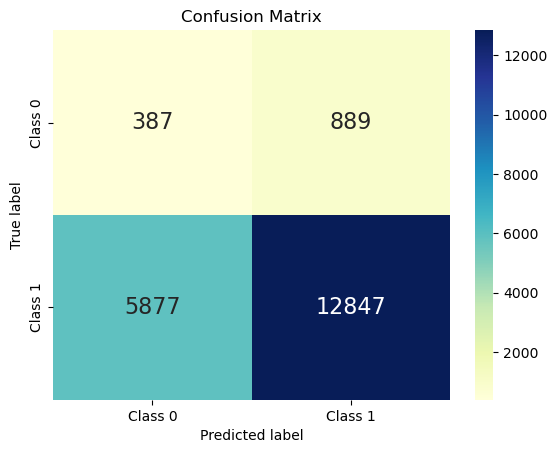

              precision    recall  f1-score   support

           0       0.06      0.30      0.10      1276
           1       0.94      0.69      0.79     18724

    accuracy                           0.66     20000
   macro avg       0.50      0.49      0.45     20000
weighted avg       0.88      0.66      0.75     20000

2-B performance evaluation


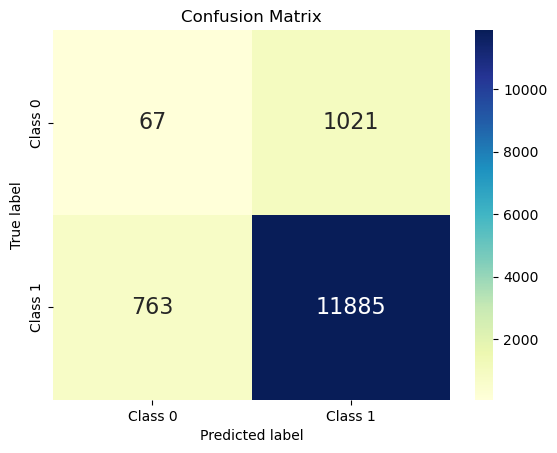

              precision    recall  f1-score   support

           0       0.08      0.06      0.07      1088
           1       0.92      0.94      0.93     12648

    accuracy                           0.87     13736
   macro avg       0.50      0.50      0.50     13736
weighted avg       0.85      0.87      0.86     13736

Model net performance evaluation


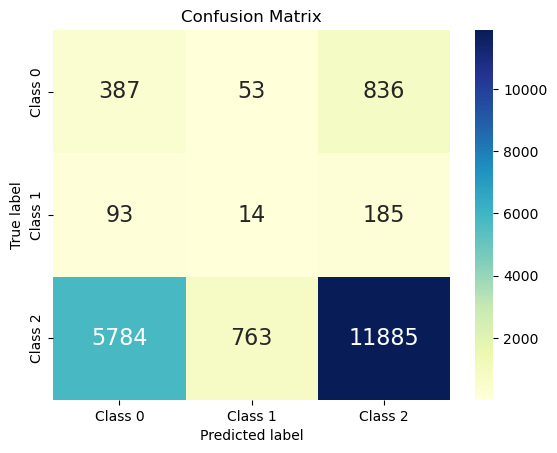

              precision    recall  f1-score   support

           0       0.06      0.30      0.10      1276
           1       0.02      0.05      0.02       292
           2       0.92      0.64      0.76     18432

    accuracy                           0.61     20000
   macro avg       0.33      0.33      0.30     20000
weighted avg       0.85      0.61      0.71     20000



In [98]:
# classifier 2-A alone
print("2-A performance evaluation")
perf_evaluate_plot(y_Final_test_2_A, y_Final_test_2_A_pred, n_class=2)

# classifier 2-B alone
print("2-B performance evaluation")
perf_evaluate_plot(y_Final_test_2_B, y_Final_test_2_B_pred, n_class=2)

# Net performance
print("Model net performance evaluation")
perf_evaluate_plot(Final_test_set["long_cat"], Final_test_set["2_B_label"], n_class=3)

#### Final words

The result is horrible to say the least. It was much better with the actual dataset for the problem that this model was built to solve. The main reason is the proportion of label 0 in both cases was very small. Although oversampling was used for counterbalancing, it was not effective. It says a lot about the importance of the quality of data for machine learning tasks.

Anyways, the idea of this notebook is to demonstrate how to use deep learning neural network to perform classification problem when the model has two-level architecture. It is possible to compare the performance of the classifier of each level to the global performance to observe the performance drop caused by error propagation.